In [4]:
import healpy as hp

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
hp.read_alm?

Signature: hp.read_alm(filename, hdu=1, return_mmax=False)
Docstring:
Read alm from a fits file.

In the fits file, the alm are written
with explicit index scheme, index = l**2+l+m+1, while healpix cxx
uses index = m*(2*lmax+1-m)/2+l. The conversion is done in this
function.

Parameters
----------
filename : str or HDUList or HDU
  The name of the fits file to read
hdu : int, or tuple of int, optional
  The header to read. Start at 0. Default: hdu=1
return_mmax : bool, optional
  If true, both the alms and mmax is returned in a tuple. Default: return_mmax=False

Returns
-------
alms[, mmax] : complex array or tuple of a complex array and an int
  The alms read from the file and optionally mmax read from the file
File:      ~/anaconda/envs/pysm2/lib/python3.6/site-packages/healpy/fitsfunc.py
Type:      function


In [6]:
ls *alm*fits

ffp10_lensed_scl_cmb_000_alm.fits  ffp10_ten_cmb_000_alm.fits


In [8]:
alm,h = hp.read_alm("ffp10_lensed_scl_cmb_000_alm.fits", hdu=(1,2,3), h=True)

TypeError: read_alm() got an unexpected keyword argument 'h'

In [19]:
alm2 = hp.read_alm("ffp10_ten_cmb_000_alm.fits", hdu=(1,2,3))

In [1]:
from astropy.io import fits

In [2]:
fits.open("ffp10_lensed_scl_cmb_000_alm.fits")[0]

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7f5f5233bda0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f5f522fc518>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f5f50c57160>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f5f50c57be0>]

In [11]:
len(alm2)

2100225

In [20]:
cmb = hp.alm2map(alm, nside=512)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


In [21]:
ten = hp.alm2map(alm2, nside=512)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


In [23]:
pysm = hp.read_map("lensed_cmb.fits")

NSIDE = 512
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


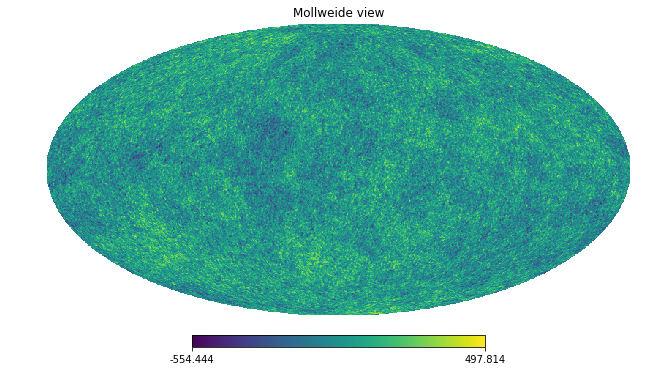

In [24]:
hp.mollview(pysm)

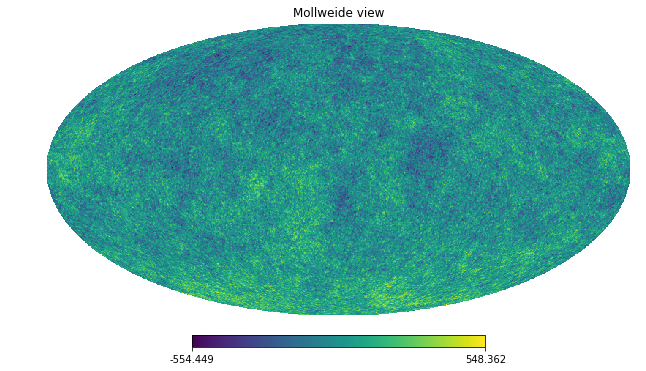

In [25]:
hp.mollview(cmb[0]*1e6)

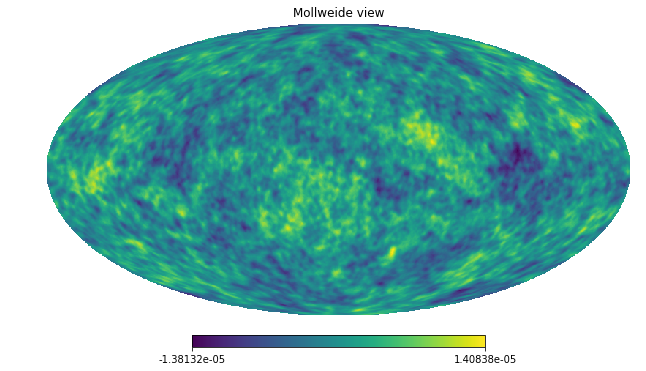

In [16]:
hp.mollview(ten)

In [26]:
ffp10 = (cmb + ten ) * 1e6

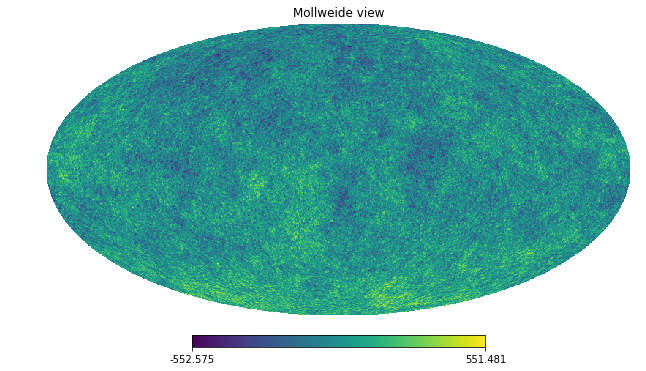

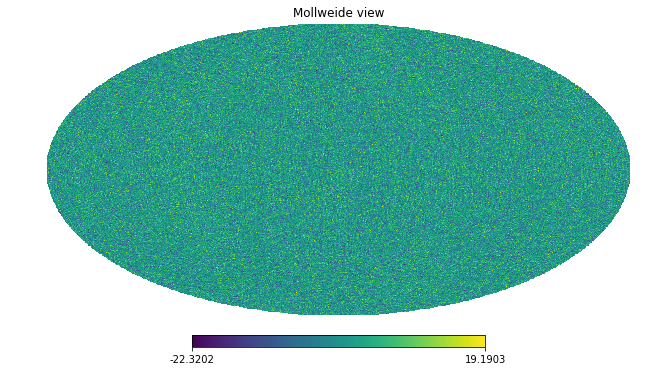

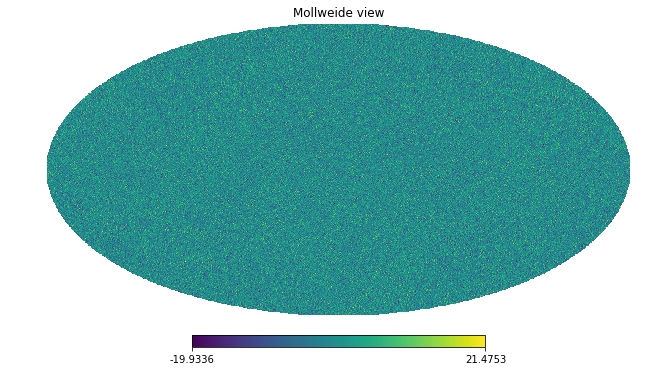

In [31]:
hp.mollview(ffp10[0])
hp.mollview(ffp10[1])
hp.mollview(ffp10[2])


In [29]:
hp.write_map?

Signature: hp.write_map(filename, m, nest=False, dtype=<class 'numpy.float32'>, fits_IDL=True, coord=None, partial=False, column_names=None, column_units=None, extra_header=(), overwrite=False)
Docstring:
Writes a healpix map into a healpix file.

Parameters
----------
filename : str
  the fits file name
m : array or sequence of 3 arrays
  the map to write. Possibly a sequence of 3 maps of same size.
  They will be considered as I, Q, U maps.
  Supports masked maps, see the `ma` function.
nest : bool, optional
  If True, ordering scheme is assumed to be NESTED, otherwise, RING. Default: RING.
  The map ordering is not modified by this function, the input map array
  should already be in the desired ordering (run `ud_grade` beforehand).
fits_IDL : bool, optional
  If True, reshapes columns in rows of 1024, otherwise all the data will
  go in one column. Default: True
coord : str
  The coordinate system, typically 'E' for Ecliptic, 'G' for Galactic or 'C' for
  Celestial (equatorial)
par

In [30]:
hp.write_map("lensed_cmb.fits", ffp10, overwrite=True)

In [32]:
import pysm

In [33]:
from pysm.nominal import models

In [35]:
sky_config = {"cmb": models("c2", nside=512)}

In [36]:
sky = pysm.Sky(sky_config)

In [38]:
cmb_pysm = sky.cmb(nu=23.)

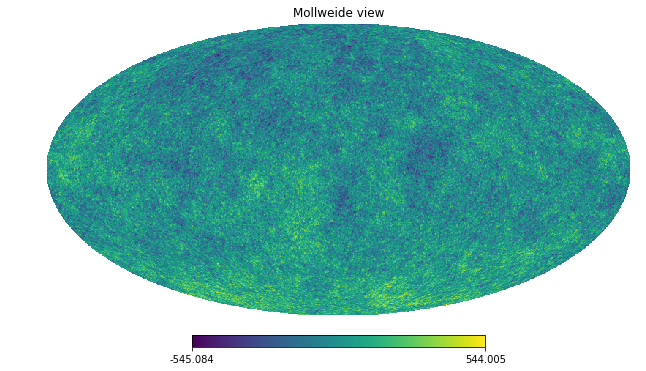

In [40]:
hp.mollview(cmb_pysm[0])

In [41]:
sky_config = {"cmb": models("c1", nside=512)}

In [42]:
sky = pysm.Sky(sky_config)

In [43]:
cmb_pysm = sky.cmb(nu=23.)

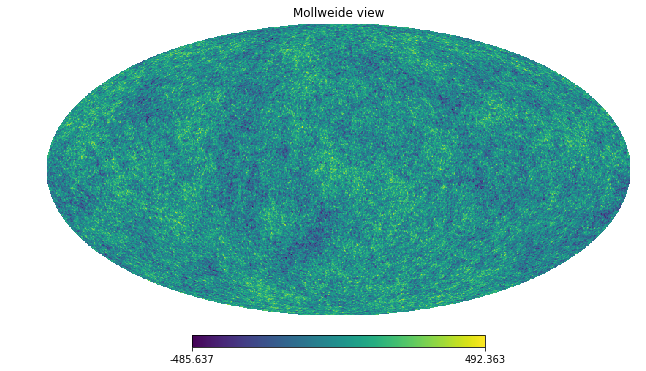

In [44]:
hp.mollview(cmb_pysm[0])